<h1 align = center> Python for Data Science - Working with Data and Numpy </h1>

## Table of Contents


<div class="alert alert-block alert-info" style="margin-top: 20px">


<li><a href="#ref1">Reading Text Files</a></li> 
<li><a href="#ref1">Writing to Text Files</a></li>  
<li><a href="#ref1">Using Pandas</a></li>
<li><a href="#ref1">NumPy with Python</a></li>

<br>
<p></p>
</div>

<hr>

Download data 

In [2]:
!wget -O Examples.txt https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/labs/example1.txt

--2019-01-24 14:25:12--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/labs/example1.txt
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45 [text/plain]
Saving to: ‘Examples.txt’

100%[======================================>] 45          --.-K/s   in 0s      

2019-01-24 14:25:13 (9.71 MB/s) - ‘Examples.txt’ saved [45/45]



<a id="ref1"></a>
<h2 align=center>Reading Text Files</h2>

One way to read or write a file in Python is to use the built-in **open** function. The **open** function provides a **File object** that contains the methods and attributes you need in order to read, save, and manipulate the file. In this notebook, we will only cover **.txt** files. The first parameter you need is the file path and the file name. An example is shown in __Figure 1__:



 <a ><img src = "https://ibm.box.com/shared/static/6wl3vw4ghflafrou0noj70t2n4hbalqr.png" width = 500, align = "center"></a>
  <h4 align=center>  
    Figure 1: Labeled Syntax of a file object.  

  </h4> 

 The mode argument is optional and the default value is **r**. In this notebook we only cover two modes: 

<li>**r** Read mode for reading files </li>
<li>**w** Write mode for writing files</li>

 For the next example, we will use the text file **Examples.txt**. The file is shown in figure 2:


 <a ><img src = "https://ibm.box.com/shared/static/ilzy3av6x1cd3gi61bq2nq0vxb0awhju.png" width = 200, align = "center"></a>
  <h4 align=center>  
    Figure 2: The text file "Example1.txt".

  </h4> 

 We read the file: 

In [4]:
example1="Examples.txt"
file1 = open(example1,"r")

 We can view the attributes of the file.

The name of the file:

In [5]:
file1.name

'Examples.txt'

 The mode the file object is in:

In [6]:
file1.mode

'r'

We can read the file and assign it to a variable :

In [7]:
FileContent=file1.read()
FileContent

'This is line 1 \nThis is line 2\nThis is line 3'

The “/n” means that there is a new line. 

We can print the file: 

In [11]:
print(FileContent)

This is line 1 
This is line 2
This is line 3


The file is of type string:

In [12]:
type(FileContent)

str

 We must close the file object:

In [13]:
file1.close()

 <h3> A  Better Way to Open a File </h3>

Using the **with** statement is better practice, it automatically closes the file even if the code encounters an exception. The code will run everything in the indent block then close the file object. 


In [15]:
with open(example1,"r") as file1:
    FileContent=file1.read()
    print(FileContent)

This is line 1 
This is line 2
This is line 3


The file object is closed, you can verify it by running the following cell:  

In [16]:
file1.closed

True

 We can see the info in the file:

In [17]:
print(FileContent)

This is line 1 
This is line 2
This is line 3


The syntax is a little confusing as the file object is after the **as** statement. We also don’t explicitly close the file. Therefore we summarise the steps in a figure:

 <a ><img src = "https://ibm.box.com/shared/static/ywul1ji1ld82xwz60ljxvbg6fs2vrunm.png" width = 500, align = "center"></a>
  <h4 align=center>  
    The syntax for opening a file using a 'with' statement.

  </h4> 

In [18]:
with open(example1,"r") as file1:
    FileContent=file1.readlines()
    print(FileContent)

['This is line 1 \n', 'This is line 2\n', 'This is line 3']


We don’t have to read the entire file, for example, we can read the first 4 characters by entering three as a parameter to the method **.read()**:


In [19]:
with open(example1,"r") as file1:
    print(file1.read(4))

This


Once the method **.read(4)** is called the first 4 characters are called.  If we call the method again, the next 4 characters are called. The output for the following cell will demonstrate the process for different inputs to the method **read() **:



In [20]:
with open(example1,"r") as file1:
    print(file1.read(4))
    print(file1.read(4))
    print(file1.read(7))
    print(file1.read(15))


This
 is 
line 1 

This is line 2


 The process is illustrated in the below figure, and each colour represents the part of the file read after the method **read()** is called:


 <a ><img src = "https://ibm.box.com/shared/static/s0xs6y4vcvabp2ll2pwspa6kd8qeoddj.png" width = 500, align = "center"></a>
  <h4 align=center>  
     Illustration using the method **.read()** to call different characters 

  </h4> 

 Here is an example using the same file, but instead we read 16, 5, and then 9 characters at a time: 

In [21]:
with open(example1,"r") as file1:
    print(file1.read(16))
    print(file1.read(5))
    print(file1.read(9))


This is line 1 

This 
is line 2


We can also read one line of the file at a time using the method **readline()**: 

In [22]:
 with open(example1,"r") as file1:
    print("first line: " + file1.readline())


first line: This is line 1 



 We can use a loop to iterate through each line: 


In [23]:
 with open(example1,"r") as file1:
        i=0;
        for line in file1:
            print("Iteration" ,str(i),":",line)
            i=i+1;

Iteration 0 : This is line 1 

Iteration 1 : This is line 2

Iteration 2 : This is line 3


We can use the method **readline()** to save the text file to a list: 

In [24]:
with open(example1,"r") as file1:
    FileasList=file1.readlines()

 Each element of the list corresponds to a line of text:

In [25]:
FileasList[0]

'This is line 1 \n'

In [26]:
FileasList[1]

'This is line 2\n'

In [27]:
FileasList[2]

'This is line 3'

<a id="ref3"></a>
<h2 align=center>Writing Files</h2>

 We can open a file object using the method ** write()**  to save the text file to a list.  To write the mode, argument must be set to  write **w**. Let’s write a file **Example2.txt** with the line: “This is line A”

In [28]:
with open('Example2.txt','w') as writefile:
    writefile.write("This is line A")

 We can read the file to see if it worked:

In [30]:
with open('Example2.txt','r') as testwritefile:
    print(testwritefile.read())

This is line A


We can write multiple lines:

In [31]:
with open('Example2.txt','w') as writefile:
    writefile.write("This is line A\n")
    writefile.write("This is line B\n")

The method **.write()** works similar to the method **.readline()**, except instead of reading a new line it writes a new line. The process is illustrated in the figure , the different colour coding of the grid represents a new line added to the file after each method call.

 <a ><img src = "https://ibm.box.com/shared/static/4d86eysjv7fiy5nocgvpbddyj2uckw6z.png" width = 500, align = "center"></a>
  <h4 align=center>  
    An example of “.write()”, the different colour coding of the grid represents a new line added after each method call.


  </h4> 

You can check the file to see if your results are correct 

In [32]:
with open('Example2.txt','r') as testwritefile:
    print(testwritefile.read())

This is line A
This is line B



 By setting the mode argument to append **a**  you can append a new line as follows:

In [33]:
with open('Example2.txt','a') as testwritefile:
    testwritefile.write("This is line C\n")

 You can verify the file has changed by running the following cell:

In [34]:
with open('Example2.txt','r') as testwritefile:
    print(testwritefile.read())

This is line A
This is line B
This is line C



 We write a list to a **.txt** file  as follows:

In [35]:
Lines=["This is line A\n","This is line B\n","This is line C\n"]
Lines

['This is line A\n', 'This is line B\n', 'This is line C\n']

In [36]:
with open('Example2.txt','w') as writefile:
    for line in Lines:
        print(line)
        writefile.write(line)

This is line A

This is line B

This is line C



 We can verify the file is written by reading it and printing out the values:  

In [37]:
with open('Example2.txt','r') as testwritefile:
    print(testwritefile.read())

This is line A
This is line B
This is line C



We can again append to the file by changing the second parameter to  **a**. This adds the code:

In [38]:
with open('Example2.txt','a') as testwritefile:
    testwritefile.write("This is line D\n")

We can see the results of appending the file: 

In [39]:
with open('Example2.txt','r') as testwritefile:
    print(testwritefile.read())

This is line A
This is line B
This is line C
This is line D



#### Copy a file 

Let's copy the file **Example2.txt** to the file **Example3.txt**:

In [40]:
with open('Example2.txt','r') as readfile:
    with open('Example3.txt','w') as writefile:
          for line in readfile:
                writefile.write(line)

We can read the file to see if everything works:

In [41]:
with open('Example3.txt','r') as testwritefile:
    print(testwritefile.read())

This is line A
This is line B
This is line C
This is line D



 After reading files, we can also write data into files and save them in different file formats like **.txt, .csv, .xls (for excel files) etc**. Let's take a look at some examples.

Now go to the directory to ensure the .txt file exists and contains the summary data that we wrote.

<h3 align = center> Working with Pandas </h3>

In [ ]:
import pandas as pd

After the import command, we now have access to a large number of pre-built classes and functions. This assumes the library is installed; in our lab environment all the necessary libraries are installed. One way pandas allows you to work with data is a dataframe. Let's go through the process to go from a comma separated values (**.csv** ) file to a dataframe. This variable **csv_path** stores the path of the  **.csv** ,that is  used as an argument to the **read_csv** function. The result is stored in the object ** df**, this is a common short form used for a variable referring to a Pandas dataframe. 

In [ ]:
csv_path='https://ibm.box.com/shared/static/keo2qz0bvh4iu6gf5qjq4vdrkt67bvvb.csv'
df = pd.read_csv(csv_path)

We can use the method **head()** to examine the first five rows of a dataframe: 


In [ ]:
df.head()

In [ ]:
#dependency  needed to install file 
!pip install xlrd

 We use the path of the excel file and the function **read_excel**. The result is a data frame as before:

In [48]:
xlsx_path='https://ibm.box.com/shared/static/mzd4exo31la6m7neva2w45dstxfg5s86.xlsx'

df = pd.read_excel(xlsx_path)
df.head()



,Artist,Album,Released,Length,Genre,Music Recording Sales (millions),Claimed Sales (millions),Released.1,Soundtrack,Rating
0,Michael Jackson,Thriller,1982,00:42:19,"pop, rock, R&B",46.0,65,1982-11-30,NaN,10.0
1,AC/DC,Back in Black,1980,00:42:11,hard rock,26.1,50,1980-07-25,NaN,9.5
2,Pink Floyd,The Dark Side of the Moon,1973,00:42:49,progressive rock,24.2,45,1973-03-01,NaN,9.0
3,Whitney Houston,The Bodyguard,1992,00:57:44,"R&B, soul, pop",27.4,44,1992-11-17,Y,8.5
4,Meat Loaf,Bat Out of Hell,1977,00:46:33,"hard rock, progressive rock",20.6,43,1977-10-21,NaN,8.0


We can access the column "Length" and assign it a new dataframe 'x':


In [49]:
x=df[['Length']]
x

,Length
0,00:42:19
1,00:42:11
2,00:42:49
3,00:57:44
4,00:46:33
5,00:43:08
6,01:15:54
7,00:40:01


 The process is shown in the figure: 

 <img src = "https://ibm.box.com/shared/static/bz800py5ui4w0kpb0k09lq3k5oegop5v.png" width = 750, align = "center"></a>

 <a id="ref2"></a>
<h2 align=center> Viewing Data and Accessing Data </h2>

You can also assign the value to a series, you can think of a Pandas series as a 1-D dataframe. Just use one bracket: 

In [50]:
x=df['Length']
x

0    00:42:19
1    00:42:11
2    00:42:49
3    00:57:44
4    00:46:33
5    00:43:08
6    01:15:54
7    00:40:01
Name: Length, dtype: object

You can also assign different columns, for example, we can assign the column 'Artist':

In [ ]:
x=df[['Artist']]
x

### Review Questions:

#### Assign the variable 'q' to the dataframe that is made up of the column 'Rating':


 <div align="right">
<a href="#q1" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q1" class="collapse">
```
q=df[['Rating']]
q
```
</div>

You can do the same thing for multiple columns; we just put the dataframe name, in this case, **df**, and the name of the multiple column headers enclosed in double brackets. The result is a new dataframe comprised of the specified columns:

In [ ]:
y=df[['Artist','Length','Genre']]
y

The process is shown in the figure:

 <img src = "https://ibm.box.com/shared/static/dh9duk3ucuhmmmbixa6ugac6g384m5sq.png" width = 1100, align = "center"></a>

In [51]:
df[['Album','Released','Length']]

,Album,Released,Length
0,Thriller,1982,00:42:19
1,Back in Black,1980,00:42:11
2,The Dark Side of the Moon,1973,00:42:49
3,The Bodyguard,1992,00:57:44
4,Bat Out of Hell,1977,00:46:33
5,Their Greatest Hits (1971-1975),1976,00:43:08
6,Saturday Night Fever,1977,01:15:54
7,Rumours,1977,00:40:01


#### Assign the variable 'q' to the dataframe that is made up of the column 'Released' and 'Artist':

 <div align="right">
<a href="#q2" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="q2" class="collapse">
```
q=df[['Released','Artist']]
q
```
</div>

One way to access unique elements is the 'ix' method, where you can access the 1st row and first column as follows :

In [52]:
#**ix** will be deprecated, use **iloc** for integer indexes 
#df.ix[0,0]
df.iloc[0,0]

'Michael Jackson'

You can access the 2nd  row and first column as follows:

In [53]:
#**ix** will be deprecated, use **iloc** for integer indexes
#df.ix[1,0]
df.iloc[1,0]

'AC/DC'

 You can access the 1st row 3rd column as follows: 

In [54]:
#**ix** will be deprecated, use **iloc** for integer indexes
#df.ix[0,2]
df.iloc[0,2]

1982

You can access the column using the name as well, the following are the same as above: 

In [ ]:
#**ix** will be deprecated, use **loc** for label-location based indexer
#df.ix[0,'Artist']
df.loc[0,'Artist']

In [ ]:
#**ix** will be deprecated, use **loc** for label-location based indexer
#df.ix[1,'Artist']
df.loc[1,'Artist']

In [56]:
#**ix** will be deprecated, use **loc** for label-location based indexer
#df.ix[0,'Released']
df.loc[0,'Released']

1982

In [55]:
#**ix** will be deprecated, use **loc** for label-location based indexer
#df.ix[1,'Released']
df.loc[1,'Released']

1980

You can perform slicing using both the index and the name of the column:

In [57]:
#**ix** will be deprecated, use **loc** for label-location based indexer
#df.ix[0:2, 0:3]
df.iloc[0:2, 0:3]


,Artist,Album,Released
0,Michael Jackson,Thriller,1982
1,AC/DC,Back in Black,1980


In [58]:
#**ix** will be deprecated, use **loc** for label-location based indexer
#df.ix[0:2, 'Artist':'Released']
df.loc[0:2, 'Artist':'Released']

,Artist,Album,Released
0,Michael Jackson,Thriller,1982
1,AC/DC,Back in Black,1980
2,Pink Floyd,The Dark Side of the Moon,1973


<h3 align= center> NumPy with Python 
    
### NumPy with 1D arrays

In [6]:
import time 
import sys
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline  

In [7]:
def Plotvec1(u,z,v):
    #this function is used in code 
    ax = plt.axes()
    ax.arrow(0, 0, *u, head_width=0.05,color ='r', head_length=0.1)
    plt.text(*(u+0.1), 'u')
    
    ax.arrow(0, 0, *v, head_width=0.05,color ='b', head_length=0.1)
    plt.text(*(v+0.1), 'v')
    ax.arrow(0, 0, *z, head_width=0.05, head_length=0.1)
    plt.text(*(z+0.1), 'z')
    plt.ylim(-2,2)
    plt.xlim(-2,2)



def Plotvec2(a,b):
    #this function is used in code 
    ax = plt.axes()
    ax.arrow(0, 0, *a, head_width=0.05,color ='r', head_length=0.1)
    plt.text(*(a+0.1), 'a')
    ax.arrow(0, 0, *b, head_width=0.05,color ='b', head_length=0.1)
    plt.text(*(b+0.1), 'b')

    plt.ylim(-2,2)
    plt.xlim(-2,2)

If you recall, a  Python list is a container that allows you to store and access data. We can create a Python List as follows:

In [62]:
a=["0",1,"two","3",4]

We can access the data via an index:

<img src = "https://ibm.box.com/shared/static/myq8bs3maj0g1sqn9yqo910zwparhhtj.png" width = 660, align = "center">


We can access each element using a square bracket as follows: 

In [63]:
print("a[0]:",a[0])
print("a[1]:",a[1])
print("a[2]:",a[2])
print("a[3]:",a[3])
print("a[4]:",a[4])

a[0]: 0
a[1]: 1
a[2]: two
a[3]: 3
a[4]: 4


A numpy array is similar to a list, it's usually fixed in size and each element is of the same type. We can cast a list to a numpy array by first importing numpy: 

In [8]:
import numpy as np 

 We then cast the list as follows:

In [9]:
a=np.array([0,1,2,3, 4])
a

array([0, 1, 2, 3, 4])

Each element is of the same type, in this case integers: 

<img src = "https://ibm.box.com/shared/static/sb97ysreaayf24b8ece1452e8m5e2vol.png" width = 500, align = "center">


 As with lists, we can access each element via a square bracket:

In [66]:
print("a[0]:",a[0])
print("a[1]:",a[1])
print("a[2]:",a[2])
print("a[3]:",a[3])
print("a[4]:",a[4])

a[0]: 0
a[1]: 1
a[2]: 2
a[3]: 3
a[4]: 4


The value of “a” is stored a follows: 

In [67]:
a

array([0, 1, 2, 3, 4])

If we check the type of the array we get "numpy.ndarray":

In [10]:
type(a)

numpy.ndarray

As numpy arrays contain data of the same type, we can use the attribute "dtype" to obtain the Data-type of the array’s elements. In this case a 64-bit integer: 


In [11]:
a.dtype

dtype('int64')

We can create a numpy array with real numbers:

In [12]:
b=np.array([3.1,11.02,6.2, 213.2,5.2])

When we check the type of the array we get "numpy.ndarray":

In [ ]:
type(b)

If we examine the attribute "dtype" we see float 64, as the elements are not integers: 

In [ ]:
b.dtype

We can change the value of the array, consider the array "c":

In [14]:
c=np.array([20,1,2,3,4])
c

array([20,  1,  2,  3,  4])

We can change the first element of the array to 100 as follows:

In [15]:
c[0]=100
c

array([100,   1,   2,   3,   4])

We can change the 5th element of the array as follows:

In [16]:
c[4]=0
c

array([100,   1,   2,   3,   0])


Like lists, we can slice the numpy array, and we can select the elements from 1 to 3 and assign it to a new numpy array 'd' as follows:


In [17]:
d=c[1:4]
d

array([1, 2, 3])

We can assign the corresponding indexes to  new values as follows: 

In [ ]:
c[3:5]=300,400
c

Similarly, we can use a list to select a specific index.
The list ' select ' contains several values:


In [18]:
select=[0,2,3]

We can use the list as an argument in the brackets. The output is the elements corresponding to the particular index:

In [19]:
d=c[select]
d

array([100,   2,   3])

We can assign the specified elements to  a new value. For example, we can assign the values to 100 000 as follows:

In [20]:
c[select]=100000
c

array([100000,      1, 100000, 100000,      0])

Let's review some basic array attributes using the array ‘a’:

In [ ]:
a=np.array([0,1,2,3, 4])
a

The attribute size is the Number of elements in the array:

In [24]:
a.size

4

The next two attributes will make more sense when we get to higher dimensions but let's review them. The attribute “ndim” represents the Number of array dimensions or the rank of the array, in this case, one:

In [21]:
a.ndim

1

The attribute “shape” is a tuple of integers indicating the size of the array in each dimension:

In [22]:
a.shape

(5,)

In [25]:
a=np.array([1,-1,1,-1])

In [26]:
mean=a.mean()
mean

0.0

In [27]:
standard_deviation=a.std()
standard_deviation

1.0

In [28]:
b=np.array([1,2,3,4,5])
b

array([1, 2, 3, 4, 5])

In [31]:
max_b=b.max()

In [32]:
max_b=b.min()

## Array Addition 

Consider the numpy array 'u':

In [35]:
u=np.array([1,0])
u

array([1, 0])

Consider the numpy array 'v':

In [34]:
v=np.array([0,1])
v

array([0, 1])

We can add the two arrays and assign it to z:

In [36]:
z=u+v
z

array([1, 1])

 The operation is equivalent to vector addition:

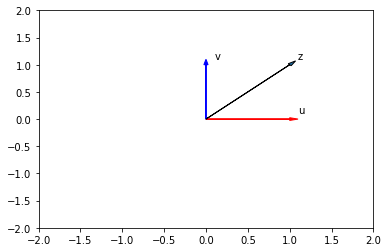

In [37]:
Plotvec1(u,z,v)

### Review Questions:

####   Implement the following vector subtraction in numpy: u-v  

 <div align="right">
<a href="#1" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="1" class="collapse">
```
u-v
```
</div>

Consider the vector numpy array 'y':

In [ ]:
y=np.array([1,2])
y

We can multiply every element in the array by 2:

In [ ]:
z=2*y
z

 This is equivalent to multiplying a vector by a scaler: 

####   Multiply the numpy array z with -2:

 <div align="right">
<a href="#2" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>

</div>
<div id="2" class="collapse">
```
-2*z
```
</div>

## Product of two numpy arrays 

 Consider the following array 'u':

In [ ]:
u=np.array([1,2])
u

 Consider the following array 'v':

In [ ]:
v=np.array([3,2])
v

 The product of the two numpy arrays 'u' and 'v' is given by:

In [ ]:
z=u*v
z

### Adding Constant to a numpy Array 

Consider the following array: 

In [ ]:
u=np.array([1,2,3,-1]) 
u

 Adding the constant 1 to the array adds 1 to each element in the array:

In [ ]:
u+1

 The process is summarised in the following animation:

 <img src = "https://ibm.box.com/shared/static/aqcmsph1r0p5la73p1zw8p9vj01opx3h.gif" width = 500, align = "center">

 This part of <a href="https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html" > Broadcasting</a> check out the link for more detail. 

### Mathematical Functions 

 We can access the value of pie in numpy as follows :

In [ ]:
np.pi

 We can create the following numpy array in Radians:

In [ ]:
x=np.array([0,np.pi/2 , np.pi] )

 We can apply the function "sine" to the array 'x' and assign the values to the array 'y'; this applies the sine function to each element in the array:  

In [ ]:
y=np.sin(x)
y

#### Linspace

 A useful function for plotting mathematical functions is "linespace".   Linespace returns evenly spaced numbers over a specified interval. We specify the starting point of the sequence and the ending point of the sequence. The parameter "num" indicates the Number of samples to generate, in this case 5:

In [39]:
np.linspace(-2,2,num=5)

array([-2., -1.,  0.,  1.,  2.])

 If we change the parameter **num** to 9, we get 9  evenly spaced numbers over the interval from -2 to 2: 

In [40]:
np.linspace(-2,2,num=9)

array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ])

We can use the function line space to generate 100 evenly spaced samples from the interval 0 to 2 pi: 

In [41]:
x=np.linspace(0,2*np.pi,num=100)


We can apply the sine function to each element in the array 'x' and assign it to the array 'y': 

In [42]:
y=np.sin(x)

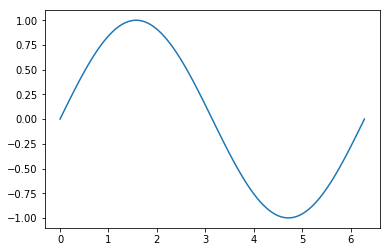

In [43]:
plt.plot(x,y)

### NumPy with 2D arrays

In [ ]:

import numpy as np 
import matplotlib.pyplot as plt


 Consider the list **a **, the list contains three nested lists **each of equal size**. 

In [ ]:
a=[[11,12,13],[21,22,23],[31,32,33]]
a

 We can cast the list to a numpy array  as follow

In [ ]:
#every elment if of the same type 
A=np.array(a)
A

We can use the attribute **ndim** to obtain the number of axes or dimensions referred to as the rank. 

In [ ]:
A.ndim

 Attribute **shape** returns a tuple corresponding to the size or number of each dimension.

In [ ]:
A.shape

The total number of elements in the array is given by the attribute **size**.

In [ ]:
A.size

### Accessing different elements of an Numpy Array 

 We can use rectangular brackets to access the different elements of the array,The correspondence  between the rectangular brackets and the list and the rectangular representation is shown in the following figure for a 3x3 array:  

 <a><img src = "https://ibm.box.com/shared/static/dsa3nfspbvarlwikt2nuva4ka8ez7stm.png" width = 500, align = "center"></a>


We can access the 2nd-row 3rd column as shown in the following figure:

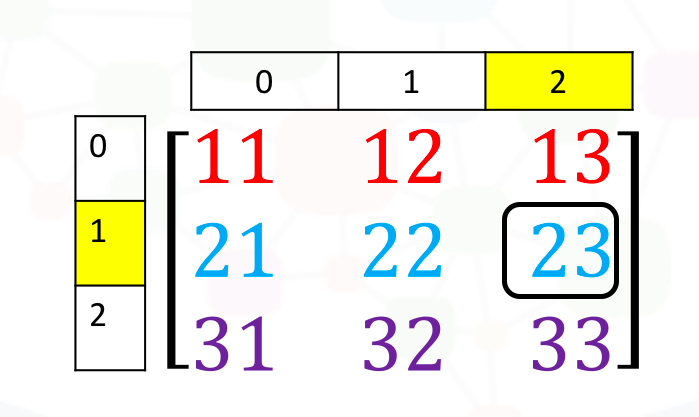

 We simply use the square brackets and the indices corresponding to the element we would like:

In [ ]:
A[1,2]

 We can also use the following notation to obtain the elements: 

In [ ]:
A[1][2]

 Consider the elements shown in the following figure 

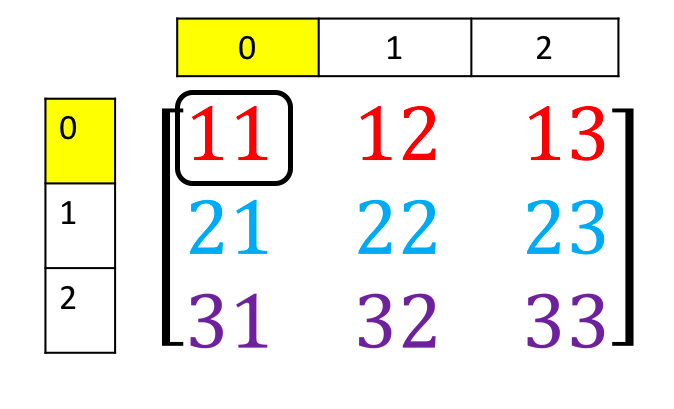

 we can access the element as follows 

In [76]:
A[0][0]

NameError: name 'A' is not defined

 We can also use slicing in numpy arrays,consider the following figure; we would like to obtain the first two columns in the first row  

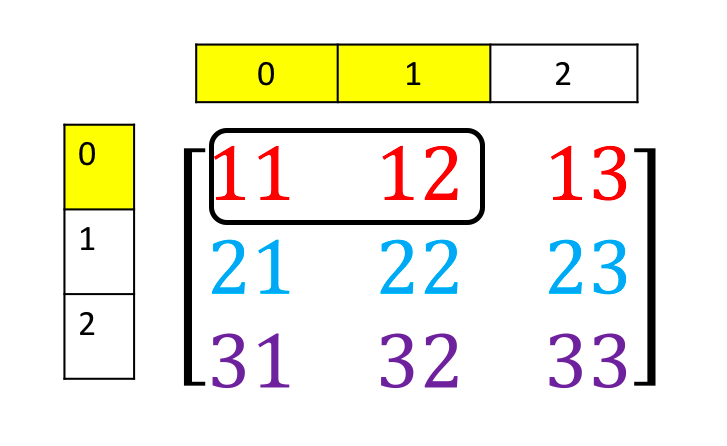

 This can be done with the following syntax 

In [ ]:
 A[0][0:2]

Similarly, we can obtain the first two rows of the 3rd column as follows:

In [ ]:
A[0:2,2]

Corresponding to the following figure: 

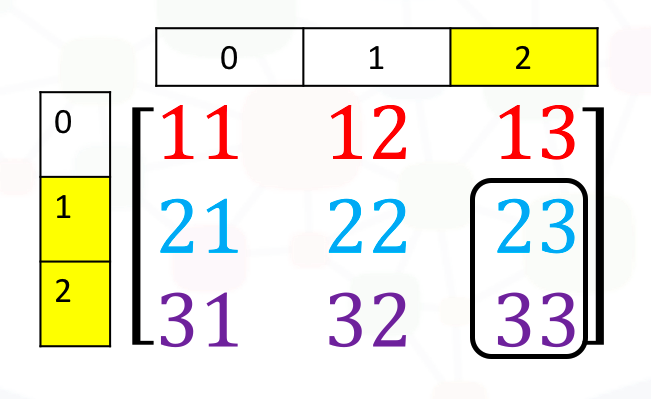

# Basic Operations 

 We can also add arrays; the process is identical to matrix addition. Matrix addition of **X** and **Y** is shown in the following figure:

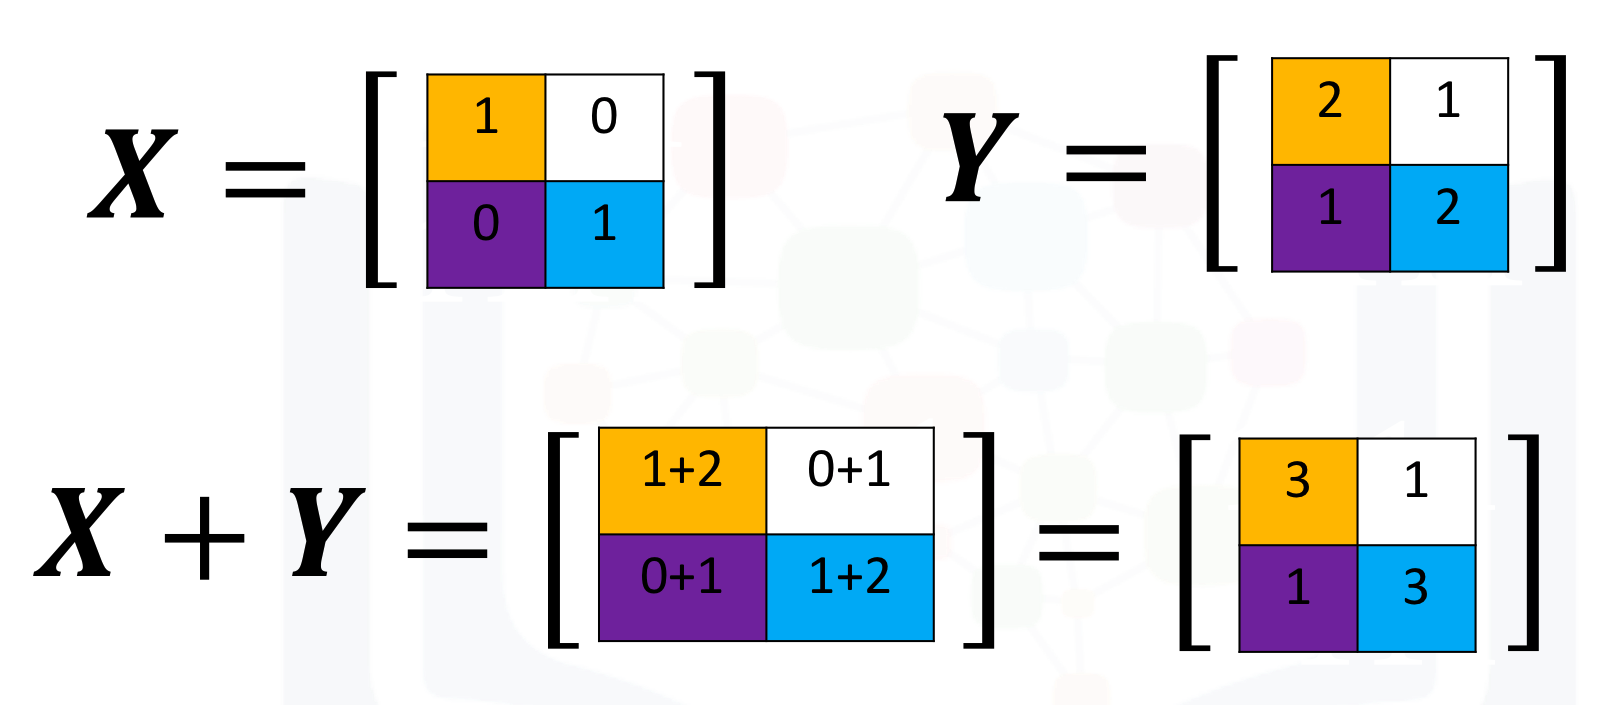

 The numpy array is given by **X** and **Y**

In [ ]:
X=np.array([[1,0],[0,1]]) 
X

In [ ]:
Y=np.array([[2,1],[1,2]]) 
Y

 We can add the numpy arrays as follows.

In [ ]:
Z=X+Y
Z

 Multiplying a numpy array by a scaler is identical to multiplying a matrix by a scaler. If we multiply the matrix **Y** by the scaler 2, we simply multiply every element in the matrix by 2 as shown in the figure.

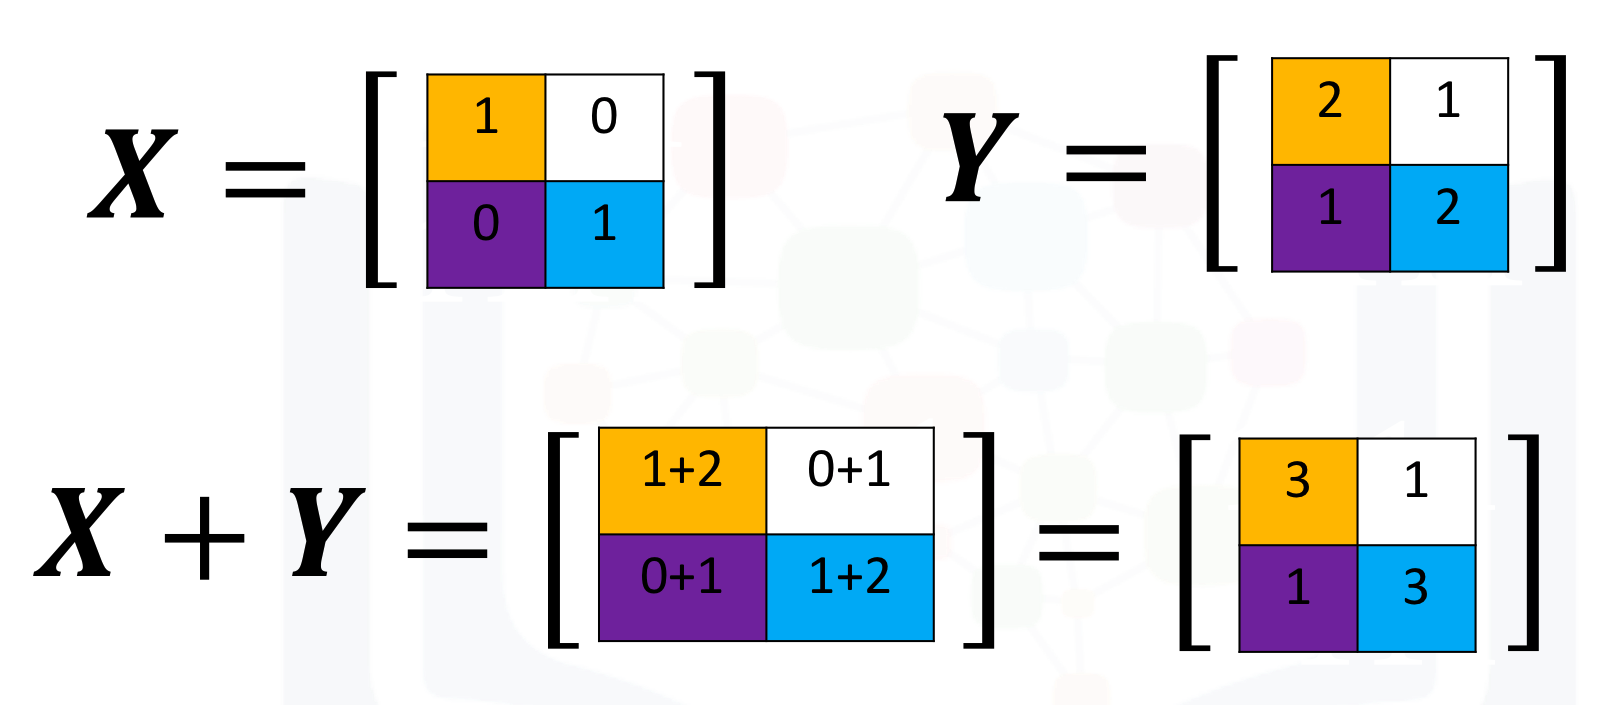

 We can perform the same operation in numpy as follows 

In [ ]:
Y=np.array([[2,1],[1,2]]) 
Y

In [ ]:
Z=2*Y
Z

 Multiplication of two arrays corresponds to an element-wise product or  Hadamard product.  Consider matrix  **X** and **Y**. The Hadamard product corresponds to multiplying each of the elements in the same position, i.e. multiplying elements contained in the same colour boxes together. The result is a new matrix that is the same size as matrix **Y** or **X**, as shown in the following figure.

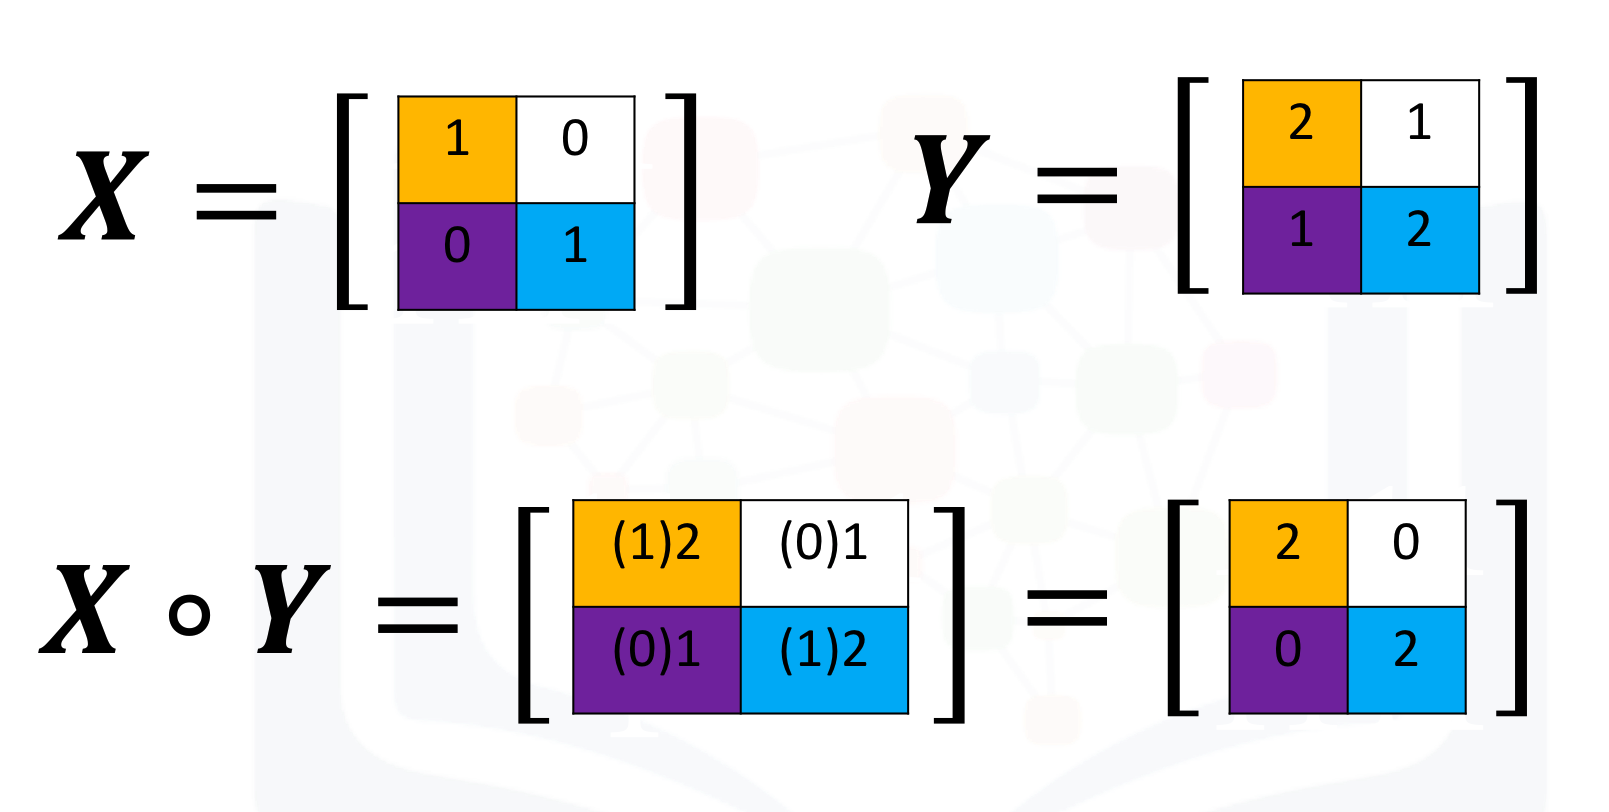

We can perform element-wise product of the array **X** and **Y** as follows:

In [ ]:
Y=np.array([[2,1],[1,2]]) 
Y

In [ ]:
X=np.array([[1,0],[0,1]]) 
X

In [ ]:
Z=X*Y
Z